In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastcore import *
from pathlib2 import Path
import json
import pandas as pd
import coco_text
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
Path().absolute()

PosixPath('/home/fredrikmathisen/Documents/text_detection')

In [4]:
#path_coco = Path('/home/paperspace/data/coco')
path_coco = Path('/home/fredrikmathisen/Documents/data/coco')

In [5]:
#Paperspace path
#img_dir = Path('/home/paperspace/data/coco/images/train2014/')
#annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

#Local path mmiv
img_dir = path_coco/'images/train2014/'
annotations = path_coco/'annotations/COCO_Text.json'


In [6]:
annotations

PosixPath('/home/fredrikmathisen/Documents/data/coco/annotations/COCO_Text.json')

In [7]:
ct_anno = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:01.770282
creating index...
index created!


In [8]:
ct_anno.info()

url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [9]:
imgs = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible'),('class','machine printed')])

In [10]:
anns = ct_anno.getAnnIds(imgIds=ct_anno.train, 
                        catIds=[('legibility','legible'),('class','machine printed')])

In [11]:
# get all images containing at least one instance of legible text
imgIds = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible')])
# pick one at random
img = ct_anno.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000104466.jpg


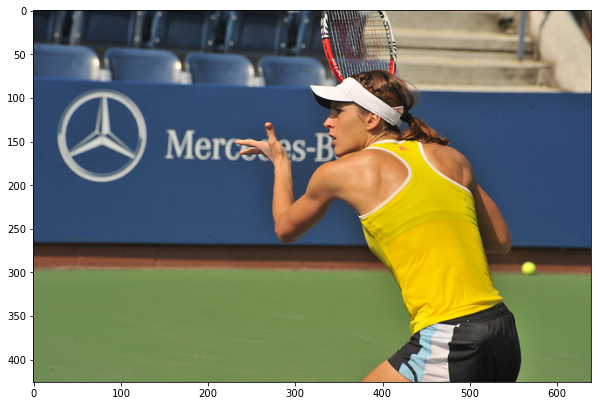

In [12]:
dataType = 'train2014'


I = io.imread('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
print('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

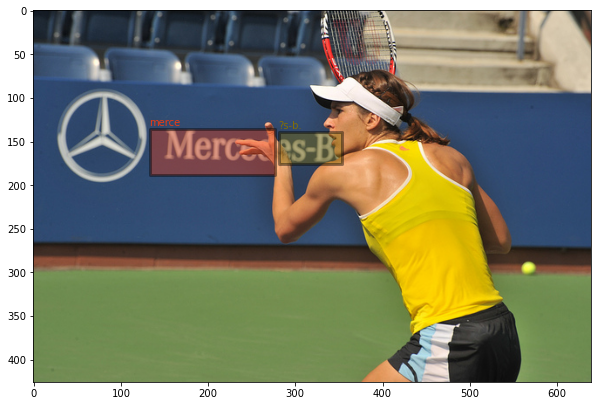

In [13]:
plt.imshow(I)
annIds = ct_anno.getAnnIds(imgIds=img['id'])
anns = ct_anno.loadAnns(annIds)
ct_anno.showAnns(anns)

In [14]:
img

{'width': 640,
 'file_name': 'COCO_train2014_000000104466.jpg',
 'set': 'train',
 'id': 104466,
 'height': 426}

In [15]:
anns

[{'polygon': [132.85614776611328,
   135.7449722290039,
   277.0155563354492,
   135.7449722290039,
   277.0155563354492,
   187.80516815185547,
   132.85614776611328,
   187.80516815185547],
  'language': 'english',
  'area': 7504.967054242035,
  'id': 1011727,
  'utf8_string': 'merce',
  'image_id': 104466,
  'bbox': [132.85614776611328,
   135.7449722290039,
   144.15940856933594,
   52.06019592285156],
  'legibility': 'legible',
  'class': 'machine printed'},
 {'polygon': [281, 139, 354, 139, 354, 176, 281, 176],
  'language': 'english',
  'area': 2701,
  'id': 1011728,
  'utf8_string': '?s-b.',
  'image_id': 104466,
  'bbox': [281, 139, 73, 37],
  'legibility': 'legible',
  'class': 'machine printed'}]

In [16]:
train_imgs = ct_anno.loadImgs(ct_anno.train)

In [17]:
len(train_imgs)

43686

In [18]:
train_imgs[0]

{'width': 612,
 'file_name': 'COCO_train2014_000000378466.jpg',
 'set': 'train',
 'id': 378466,
 'height': 612}

In [19]:
train_anno_ids = ct_anno.getAnnIds(ct_anno.train)

In [20]:
len(train_anno_ids)

118309

In [21]:
type(train_anno_ids[0])

int

In [22]:
train_annos = ct_anno.loadAnns(train_anno_ids)

In [23]:
len(train_annos)

118309

In [24]:
train_annos[0]['bbox']

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [25]:
from fastai.vision.all import *

In [26]:
img_names = get_image_files(img_dir)

In [27]:
img_names = get_image_files(img_dir)[:10]

In [28]:
def get_annotations_text(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    id2images, id2bboxes = {}, collections.defaultdict(list),
    for o in annot_dict['anns'].keys():
        anns = annot_dict['anns'][o]
        bb = anns['bbox']
        #id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]])
        id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[2], bb[3]])
    id_image_list = []
    fnames = []
    for o in annot_dict['imgs'].keys():
        imgs = annot_dict['imgs'][o]
        id2images = {imgs['id']:ifnone(prefix, '') + imgs['file_name'] for img in annot_dict['imgs'].keys() if imgs['id'] in id2bboxes}
        
        if id2images: id_image_list.append(id2images), fnames.append(imgs['file_name'])
    return id_image_list, id2bboxes, fnames
    

## Make dataframe instead...

In [29]:
annot_dict = json.load(open(annotations))

In [30]:
df = pd.DataFrame.from_dict(annot_dict['imgs'], orient='index')

In [31]:
df.head()

width                        file_name    set      id  height
378466    612  COCO_train2014_000000378466.jpg  train  378466     612
287140    640  COCO_train2014_000000287140.jpg  train  287140     425
332243    427  COCO_train2014_000000332243.jpg  train  332243     640
370250    427  COCO_train2014_000000370250.jpg   test  370250     640
11544     427  COCO_train2014_000000011544.jpg  train   11544     640

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63686 entries, 378466 to 372443
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   width      63686 non-null  int64 
 1   file_name  63686 non-null  object
 2   set        63686 non-null  object
 3   id         63686 non-null  int64 
 4   height     63686 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [33]:
df_anns = pd.DataFrame.from_dict(annot_dict['anns'], orient='index')[['image_id', 'bbox', 'class']]

In [34]:
df_anns.head()

image_id  \
1231468     10581   
1231469     90194   
1231466     10581   
1231467     10581   
1231464     10581   

                                                                                   bbox  \
1231468  [380.57979575247066, 581.7662670169573, 34.61944800040967, 28.800152854072127]   
1231469  [395.0547486739076, 143.6841232385957, 26.487496842637043, 23.496727967518495]   
1231466   [392.7038412094116, 55.81083655357361, 21.270051956176758, 7.109695911407471]   
1231467   [371.4147456028465, 572.3458411748494, 41.98825781774451, 34.092497337801206]   
1231464   [379.8077564467068, 55.29220921901123, 13.643856788567193, 5.194592787198475]   

                   class  
1231468  machine printed  
1231469  machine printed  
1231466           others  
1231467  machine printed  
1231464           others

In [35]:
df_final = df.merge(df_anns, left_on='id', right_on='image_id')

In [36]:
df_final.head()

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   

             class  
0  machine printed  
1  machine printed  
2  machine printed  
3  machine printed  
4  machine printed

## Old stuff (to be updated)

In [163]:
annot_dict = json.load(open(annotations))

In [ ]:
df.head()

In [157]:
test_images, test_lbl_bbox, fnames = get_annotations_text(annotations)

KeyboardInterrupt: 

In [ ]:
# Save a as picke
#import pickle
#pickle.save(test_images)

In [151]:
len(test_images)

0

In [22]:
test_images

[{287140: 'COCO_train2014_000000287140.jpg'},
 {370258: 'COCO_train2014_000000370258.jpg'},
 {36606: 'COCO_train2014_000000036606.jpg'},
 {286892: 'COCO_train2014_000000286892.jpg'},
 {286897: 'COCO_train2014_000000286897.jpg'},
 {19397: 'COCO_train2014_000000019397.jpg'},
 {281774: 'COCO_train2014_000000281774.jpg'},
 {182728: 'COCO_train2014_000000182728.jpg'},
 {479864: 'COCO_train2014_000000479864.jpg'},
 {120120: 'COCO_train2014_000000120120.jpg'},
 {215304: 'COCO_train2014_000000215304.jpg'},
 {498601: 'COCO_train2014_000000498601.jpg'},
 {120127: 'COCO_train2014_000000120127.jpg'},
 {359106: 'COCO_train2014_000000359106.jpg'},
 {58143: 'COCO_train2014_000000058143.jpg'},
 {413923: 'COCO_train2014_000000413923.jpg'},
 {413927: 'COCO_train2014_000000413927.jpg'},
 {458339: 'COCO_train2014_000000458339.jpg'},
 {311174: 'COCO_train2014_000000311174.jpg'},
 {88398: 'COCO_train2014_000000088398.jpg'},
 {311173: 'COCO_train2014_000000311173.jpg'},
 {527748: 'COCO_train2014_000000527748

In [107]:
test_images_dict = defaultdict(list) 
for sub in test_images: 
    for key in sub: 
        test_images_dict[key].append(sub[key]) 

In [43]:
test_lbl_bbox

defaultdict(list,
            {10581: [[380.57979575247066,
               581.7662670169573,
               415.1992437528803,
               610.5664198710294],
              [392.7038412094116,
               55.81083655357361,
               413.9738931655884,
               62.92053246498108],
              [371.4147456028465,
               572.3458411748494,
               413.403003420591,
               606.4383385126506],
              [379.8077564467068,
               55.29220921901123,
               393.45161323527395,
               60.4868020062097],
              [343.9816292664045,
               55.02807738237401,
               379.36763203417235,
               60.83897778839264],
              [346.87852724257345, 17, 381.99741766934727, 27.42441684223501],
              [33.242266949152544,
               513.620253164557,
               57.54735169491526,
               558.9873417721519],
              [55.351165771484375,
               544.2091827392578,
    

## Plot bboxes on images

In [37]:
df_final.head(10)

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
5    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
6    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
7    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
8    640  COCO_train2014_000000036606.jpg    val   36606     480     36606   
9    425  COCO_train2014_000000286892.jpg  train  286892     640    286892   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   
5   [385.05562926502114, 253.7083250208507, 20.687630630113972, 21.930334821579805]   
6  [431.88310233979763, 328.99746192893406, 125.19392917369309, 39.911167512690355]   
7   [384.5875204593814, 205.28680581440204, 13.367927831237239, 28.222439396586537]   
8        [430.9137268066406, 95.5457534790039, 75.669677734375, 113.17976379394531]   
9    [51.25297619047619, 183.89873417721518, 30.761904761904763, 29.16455696202533]   

             class  
0  machine printed  
1  machine printed  
2  machine printed  
3  machine printed  
4  machine printed  
5  machine printed  
6  machine printed  
7  machine printed  
8  machine printed  
9  machine printed

In [38]:
test_id = df_final.image_id[0]

In [39]:
test_id

287140

In [40]:
def get_path(imgid):
    return str(img_dir) + '/' + df_final[df_final.image_id == imgid].file_name[0]

In [41]:
get_path(test_id)

'/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000287140.jpg'

In [42]:
def get_first_bbox(imgid):
    return df_final[df_final.image_id == imgid].bbox[0]

In [43]:
get_path(test_id)

'/home/fredrikmathisen/Documents/data/coco/images/train2014/COCO_train2014_000000287140.jpg'

In [44]:
get_first_bbox(test_id)

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [45]:
import matplotlib.patches as patches

In [46]:
import skimage.io as io

In [47]:
def plt_img_bbox(imgid):
    img = get_path(imgid)
    bbox = get_first_bbox(imgid)
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], color='r')
    f, ax = plt.subplots()
    ax.imshow(io.imread(img))
    ax.add_artist(rect)
    plt.show()

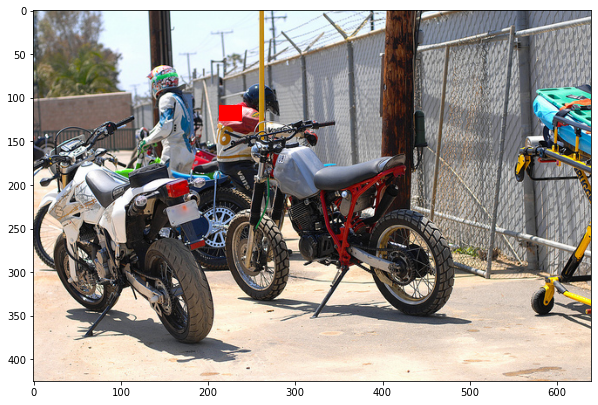

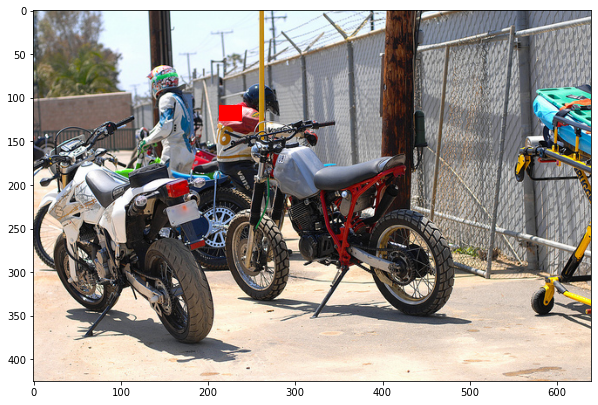

KeyError: 0

In [48]:
for img in list(df_final['image_id'].values)[:5]:
    plt_img_bbox(img)

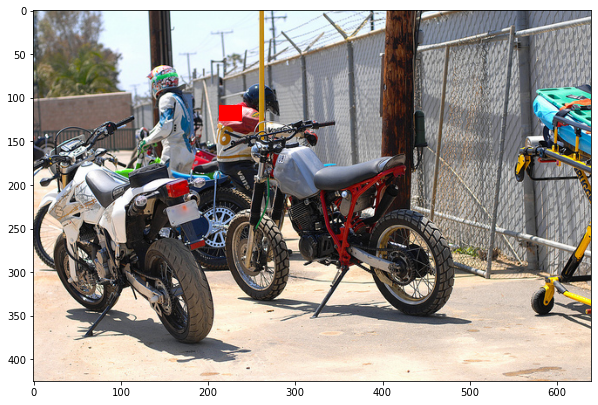

In [49]:
plt_img_bbox(test_id)

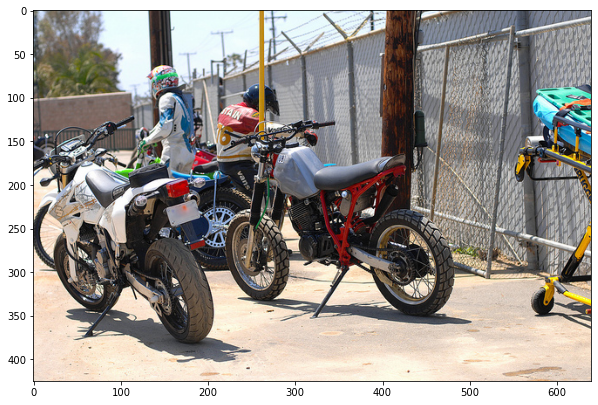

In [50]:
I = io.imread(get_path(test_id))
plt.imshow(I)

In [ ]:
len(df_final)

In [51]:
??BBoxBlock()

Object `BBoxBlock()` not found.


In [52]:
df_final['height'].max()

640

In [53]:
df_final['is_valid'] = False
df_final.loc[df_final.set == 'val', 'is_valid'] = True

In [54]:
df_final.head()

width                        file_name    set      id  height  image_id  \
0    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1    640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4    640  COCO_train2014_000000370258.jpg  train  370258     425    370258   

                                                                               bbox  \
0  [212.35294117647058, 108.67088607594941, 25.815126050420183, 17.215189873417717]   
1     [617.8655462184873, 179.68354430379748, 21.13445378151266, 43.03797468354429]   
2   [386.0244126138872, 232.46763051647233, 15.294314420663113, 13.539378859633473]   
3                                                               [108, 105, 138, 37]   
4                                                               [266, 105, 183, 37]   

             class  is_valid  
0  machine printed     False  
1  machine printed     False  
2  machine printed     False  
3  machine printed     False  
4  machine printed     False

In [63]:
df_final.is_valid.value_counts()

False    118312
True      27550
Name: is_valid, dtype: int64

In [68]:
df_final['class'].value_counts()

machine printed    125759
others              13287
handwritten          6816
Name: class, dtype: int64

In [56]:
img_dir

PosixPath('/home/fredrikmathisen/Documents/data/coco/images/train2014')

In [69]:
df_new = df_final.copy()
df_new = df_new[:300].reset_index(drop=True)

In [70]:
df_new.is_valid.value_counts()

False    247
True      53
Name: is_valid, dtype: int64

In [155]:
df_new['class'] = "s"

In [156]:
df_new['class']

0      s
1      s
2      s
3      s
4      s
      ..
295    s
296    s
297    s
298    s
299    s
Name: class, Length: 300, dtype: object

In [157]:
dblock = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock(vocab=None)),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('file_name', pref=(str(img_dir)+'/')),
                   get_y=[ColReader('bbox'), ColReader('class')],
                   item_tfms = Resize(256),
                   batch_tfms=aug_transforms(),
                   n_inp=1)
#dblock.c = 3

In [158]:
dls = dblock.dataloaders(df_new, bs=16)

In [159]:
dls.one_batch()

(TensorImage([[[[6.4915e-01, 6.4671e-01, 6.4817e-01,  ..., 6.4228e-01,
            6.4486e-01, 6.4314e-01],
           [6.4872e-01, 6.4817e-01, 6.4734e-01,  ..., 6.4487e-01,
            6.4212e-01, 6.4354e-01],
           [6.4662e-01, 6.4374e-01, 6.4494e-01,  ..., 6.4183e-01,
            6.4063e-01, 6.4018e-01],
           ...,
           [5.7314e-01, 5.7813e-01, 5.7553e-01,  ..., 6.2652e-01,
            6.2618e-01, 6.2424e-01],
           [5.7717e-01, 5.8214e-01, 5.7800e-01,  ..., 6.2233e-01,
            6.2199e-01, 6.2309e-01],
           [5.8595e-01, 5.8742e-01, 5.8330e-01,  ..., 6.1814e-01,
            6.1953e-01, 6.2307e-01]],
 
          [[7.2351e-01, 7.2478e-01, 7.2623e-01,  ..., 7.2469e-01,
            7.2895e-01, 7.2531e-01],
           [7.2569e-01, 7.2623e-01, 7.2541e-01,  ..., 7.2540e-01,
            7.2715e-01, 7.2774e-01],
           [7.2470e-01, 7.2184e-01, 7.2303e-01,  ..., 7.2407e-01,
            7.2597e-01, 7.3031e-01],
           ...,
           [5.7144e-01, 5.7630e-0

In [160]:
dblock.summary(df_new)

Setting-up type transforms pipelines
0      640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
1      640  COCO_train2014_000000287140.jpg  train  287140     425    287140   
2      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
3      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
4      640  COCO_train2014_000000370258.jpg  train  370258     425    370258   
..     ...                              ...    ...     ...     ...       ...   
295    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
296    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
297    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
298    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   
299    480  COCO_train2014_000000290489.jpg    val  290489     640    290489   

                                                                                 b

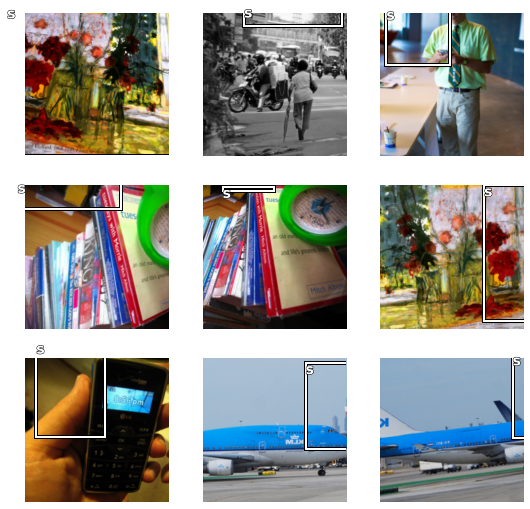

In [161]:
dls.show_batch()

In [59]:
df_final.set.value_counts()

train    118312
val       27550
Name: set, dtype: int64

In [60]:
df_final['is_valid'] = False
df_final.loc[df_final.set == 'val', 'is_valid'] = True

In [166]:
import retinanet

ImportError: cannot import name '_get_sfs_idxs' from 'fastai.vision.models.unet' (/home/fredrikmathisen/anaconda3/lib/python3.8/site-packages/fastai/vision/models/unet.py)

In [162]:
learner = cnn_learner(dls, xresnet34, loss_func=MSELossFlat()).to_fp16()

In [163]:
learner.lr_find()

TypeError: __call__() takes 3 positional arguments but 4 were given